# Challenge Stage - Risque de Marché Banque de France

## Reconstitution des données manquantes

### Importation des fichiers Excels

In [91]:
import pandas as pd
import numpy as np  

Bond_Risk_Perf = pd.read_excel('Bonds_Risk_Perf.xlsx')

Issuer_deals = pd.read_excel('Issuer_deals.xlsx')
Issuer_deals

,ISSUER,ISIN,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AUGOC,AU2CLT274918,800000000000,LOW,AUSTRALIA
1,AUGOC,AU2CLT739284,14040000000000,LOW,AUSTRALIA
2,AUGOC,AU2CLT184729,3643001000000,LOW,AUSTRALIA
3,AUGOC,AU2CLT928374,800000000000,LOW,AUSTRALIA
4,AUGOC,AU2CLT647291,800000000000,LOW,AUSTRALIA
5,AUGOC,AU3SG0382917,800000000000,LOW,AUSTRALIA
6,AUGOC,AU2CLT491827,7750000000000,LOW,AUSTRALIA
7,AUGOC,AU2CLT829374,800000000000,LOW,AUSTRALIA
8,AUGOC,AU3TB0572839,1190000000000,LOW,AUSTRALIA
9,AUGOC,AU2CLT283749,800000000000,JUNK,AUSTRALIA


Affichage des types de chaque colonne

In [92]:
print(Bond_Risk_Perf.dtypes)

ISIN                    object
BUCKET                  object
MATURITY        datetime64[ns]
PRICE                  float64
COUPON %               float64
COUPON FREQ              int64
YIELD %                float64
MOD.DURATION           float64
IR01                   float64
dtype: object


Merge les datasets en réduisant l'affichage des obligations à celles :

- qui ont un volume supérieur à $10^{12}$
- qui ont un risque "LOW"

In [93]:
filtered_bond = Issuer_deals[(Issuer_deals['VOL_OUTSTANDING'] > 1e12) & (Issuer_deals['ISSUER_RISK_CAT'] == "LOW")]
df = pd.merge(Bond_Risk_Perf, filtered_bond, on='ISIN', how='right')

Conversion de la maturité en date

In [94]:
df['MATURITY'] = pd.to_datetime(df['MATURITY'])
df

,ISIN,BUCKET,MATURITY,PRICE,COUPON %,COUPON FREQ,YIELD %,MOD.DURATION,IR01,ISSUER,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AU2CLT739284,3M - 6M - 1Y,2025-03-14,NaN,0.00,0,4.450,NaN,NaN,AUGOC,14040000000000,LOW,AUSTRALIA
1,AU2CLT184729,NaN,2025-03-28,NaN,0.00,0,4.303,NaN,NaN,AUGOC,3643001000000,LOW,AUSTRALIA
2,AU2CLT491827,2Y - 3Y - 4Y,2027-04-21,NaN,2.75,1,4.020,NaN,NaN,AUGOC,7750000000000,LOW,AUSTRALIA
3,AU3TB0572839,2Y - 3Y - 4Y,2028-05-21,NaN,1.00,1,3.794,NaN,NaN,AUGOC,1190000000000,LOW,AUSTRALIA
4,KR482913AE88,3M - 6M - 1Y,2025-01-09,NaN,0.00,0,3.010,NaN,NaN,KORM,15331000000000,LOW,KOREA
5,KR715389AE99,3M - 6M - 1Y,2025-03-03,NaN,0.00,0,2.860,NaN,NaN,KORM,8170000000000,LOW,KOREA
6,KR572839AE98,3M - 6M - 1Y,2025-12-10,NaN,3.50,2,2.700,NaN,NaN,KORM,13060000000000,LOW,KOREA
7,KR148293AE97,3M - 6M - 1Y,2026-03-10,NaN,2.50,2,2.720,NaN,NaN,KORM,8060000000000,LOW,KOREA
8,KR937412AEA1,3M - 6M - 1Y,2026-06-10,NaN,2.75,2,2.700,NaN,NaN,KORM,1230000000000,LOW,KOREA
9,KR628471GD11,2Y - 3Y - 4Y,2027-06-10,NaN,2.75,2,2.670,NaN,NaN,KORM,3880000000000,LOW,KOREA


### Calcul du bucket

In [95]:
import datetime   

# Function to get the time to maturity
def get_time_to_maturity(date):
    time = date - pd.to_datetime("2025-01-01", format='%Y-%m-%d')
    time = time.days / 365.25
    if time < 2:
        return "3M - 6M - 1Y"
    elif time <=4:
        return "2Y - 3Y - 4Y"
    elif time < 8:
        return "5Y - 6Y - 7Y"
    else:
        return "8Y - 9Y - 10Y"

In [96]:
df['BUCKET'] = df.apply(lambda row: get_time_to_maturity(row['MATURITY']) if pd.isnull(row['BUCKET']) else row['BUCKET'], axis=1)
df

,ISIN,BUCKET,MATURITY,PRICE,COUPON %,COUPON FREQ,YIELD %,MOD.DURATION,IR01,ISSUER,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AU2CLT739284,3M - 6M - 1Y,2025-03-14,NaN,0.00,0,4.450,NaN,NaN,AUGOC,14040000000000,LOW,AUSTRALIA
1,AU2CLT184729,3M - 6M - 1Y,2025-03-28,NaN,0.00,0,4.303,NaN,NaN,AUGOC,3643001000000,LOW,AUSTRALIA
2,AU2CLT491827,2Y - 3Y - 4Y,2027-04-21,NaN,2.75,1,4.020,NaN,NaN,AUGOC,7750000000000,LOW,AUSTRALIA
3,AU3TB0572839,2Y - 3Y - 4Y,2028-05-21,NaN,1.00,1,3.794,NaN,NaN,AUGOC,1190000000000,LOW,AUSTRALIA
4,KR482913AE88,3M - 6M - 1Y,2025-01-09,NaN,0.00,0,3.010,NaN,NaN,KORM,15331000000000,LOW,KOREA
5,KR715389AE99,3M - 6M - 1Y,2025-03-03,NaN,0.00,0,2.860,NaN,NaN,KORM,8170000000000,LOW,KOREA
6,KR572839AE98,3M - 6M - 1Y,2025-12-10,NaN,3.50,2,2.700,NaN,NaN,KORM,13060000000000,LOW,KOREA
7,KR148293AE97,3M - 6M - 1Y,2026-03-10,NaN,2.50,2,2.720,NaN,NaN,KORM,8060000000000,LOW,KOREA
8,KR937412AEA1,3M - 6M - 1Y,2026-06-10,NaN,2.75,2,2.700,NaN,NaN,KORM,1230000000000,LOW,KOREA
9,KR628471GD11,2Y - 3Y - 4Y,2027-06-10,NaN,2.75,2,2.670,NaN,NaN,KORM,3880000000000,LOW,KOREA


### Calcul du prix des obligations

Formule du prix d'une obligation :

$$ P = \sum_{i=1}^n \frac{C}{(1 + r)^{t_i}} + \frac{F}{(1 + r)^{t_n}} $$ 

où :
- $P$  : Prix de l'obligation.
- $C$  : Coupon périodique.
- $F$  : Valeur nominale de l'obligation.
- $r$  : Taux d'actualisation ou taux d'intérêt du marché.
- $n$  : Nombre total de périodes jusqu'à l'échéance.

#### Date de distribution des coupons

Créons une fonction qui renvoie les dates des paiements des coupons jusqu'à la maturité, en supposant que la date actuelle soit le 2025-01-01.

In [97]:
def payments_remaining(frequency, maturity):
    # Initialize the list of dates
    date_list = []

    # While the maturity date is greater than 2025-01-01
    while maturity>=pd.to_datetime("2025-01-01", format='%Y-%m-%d'):
        
        # Check if the maturity date is before the current date
        if maturity<pd.to_datetime("2025-01-01", format='%Y-%m-%d'):
            break
        
        # Add the maturity date to the list if it is not before the current date
        date_list.append(maturity)

        # Subtract the number of months in a year divided by the frequency to get the next date
        maturity = maturity - pd.DateOffset(months=12/frequency)

    # Return the list of dates sorted in ascending order
    return sorted(date_list)

#### Calcul du prix de l'obligation

In [98]:
def bond_price(row):
    # frequency of coupon payments
    frequency = row['COUPON FREQ']

    # face value of the bond
    face_value = 100

    # yield rate of the bond in decimal form
    yield_rate = row['YIELD %'] / 100

    # current date
    current_date = pd.to_datetime("2025-01-01", format='%Y-%m-%d')

    # if the bond has no coupon payments (zero-coupon bond)
    if frequency == 0:
        # calculate the years to maturity
        years_to_maturity = (row['MATURITY'] - current_date).days / 365
        # calculate the price of the bond
        return face_value/(1+yield_rate)**years_to_maturity

    # calculate the coupon payment
    coupon = row['COUPON %']/frequency

    # calculate the dates of the coupon payments
    payment_dates = payments_remaining(frequency, row['MATURITY'])

    # calculate the time for each payment in year 
    days_to_payment = [(date - current_date).days / 365 for date in payment_dates]

    # Iniiate the price of the bond
    price = 0
    
    # calculate the price of the bond by summing the present value of each coupon payment
    for t in days_to_payment:
        price += coupon/(1+yield_rate/frequency)**(frequency*t)
       
    # add the face value of the bond to the price at the last payment date
    price += face_value/(1+yield_rate/frequency)**(days_to_payment[-1]*frequency)
        
    return price


Application de la fonction à notre dataset

In [99]:
df['PRICE'] = df.apply(lambda row: bond_price(row), axis=1)
df

,ISIN,BUCKET,MATURITY,PRICE,COUPON %,COUPON FREQ,YIELD %,MOD.DURATION,IR01,ISSUER,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AU2CLT739284,3M - 6M - 1Y,2025-03-14,99.144840,0.00,0,4.450,NaN,NaN,AUGOC,14040000000000,LOW,AUSTRALIA
1,AU2CLT184729,3M - 6M - 1Y,2025-03-28,99.012260,0.00,0,4.303,NaN,NaN,AUGOC,3643001000000,LOW,AUSTRALIA
2,AU2CLT491827,2Y - 3Y - 4Y,2027-04-21,99.170387,2.75,1,4.020,NaN,NaN,AUGOC,7750000000000,LOW,AUSTRALIA
3,AU3TB0572839,2Y - 3Y - 4Y,2028-05-21,91.884951,1.00,1,3.794,NaN,NaN,AUGOC,1190000000000,LOW,AUSTRALIA
4,KR482913AE88,3M - 6M - 1Y,2025-01-09,99.935022,0.00,0,3.010,NaN,NaN,KORM,15331000000000,LOW,KOREA
5,KR715389AE99,3M - 6M - 1Y,2025-03-03,99.529844,0.00,0,2.860,NaN,NaN,KORM,8170000000000,LOW,KOREA
6,KR572839AE98,3M - 6M - 1Y,2025-12-10,100.947201,3.50,2,2.700,NaN,NaN,KORM,13060000000000,LOW,KOREA
7,KR148293AE97,3M - 6M - 1Y,2026-03-10,100.527018,2.50,2,2.720,NaN,NaN,KORM,8060000000000,LOW,KOREA
8,KR937412AEA1,3M - 6M - 1Y,2026-06-10,100.238553,2.75,2,2.700,NaN,NaN,KORM,1230000000000,LOW,KOREA
9,KR628471GD11,2Y - 3Y - 4Y,2027-06-10,100.356085,2.75,2,2.670,NaN,NaN,KORM,3880000000000,LOW,KOREA


### Calcul de la modified duration

La modified duration définie par :

$$
\frac{\Delta P}{P} \approx -D^*\Delta y 
$$

avec
 
$$ D^* = \frac{D}{(1+y/m)}$$

et :

- $P$, le prix de l'obligation
- $y$, le rendement de l'obligation
- $m$, le nombre de paiements de coupons effectués par an
- $D$, la duration de l'obligation


Après avoir dérivé le fonction du prix de l'obligation par le rendement, on trouve la formule de la duration suivante:

$D^* = -(1+y/m)^{-1} \sum_{i=1}^{n} \frac{t_i c_i}{(1+y/m)^{mt_i}}$

In [100]:
def modified_duration(row):
    # frequency of coupon payments
    frequency = row['COUPON FREQ']

    # price of the bond
    price = row['PRICE']

    # face value of the bond
    face_value = 100

    # yield rate of the bond in decimal form
    yield_rate = row['YIELD %'] / 100

    # current date
    current_date = pd.to_datetime("2025-01-01", format='%Y-%m-%d')

    # if the bond has no coupon payments
    if frequency == 0:
        # calculate the years to maturity
        years_to_maturity = (row['MATURITY'] - current_date).days / 365
        # calculate the modified duration of the bond
        return (face_value*years_to_maturity)/(((1+yield_rate)**(years_to_maturity+1))*price)

    # calculate the coupon payment
    coupon = row['COUPON %']/frequency

    # calculate the dates of the coupon payments
    payment_dates = payments_remaining(frequency, row['MATURITY'])

    # calculate the time for each payment in year 
    days_to_payment = [(date - current_date).days / 365 for date in payment_dates]

    # Iniiate the modified duration of the bond
    modified_duration = 0
    
    # calculate the price of the bond by summing the present value of each coupon payment
    for t in days_to_payment:
        modified_duration += (coupon*t)/(((1+yield_rate/frequency)**(frequency*t))*price)
       
    # add the face value of the bond to the price at the last payment date
    modified_duration += (face_value*days_to_payment[-1])/(((1+yield_rate/frequency)**(days_to_payment[-1]*frequency))*price)
     
    return modified_duration/(1+yield_rate/frequency)

In [101]:
df['MOD.DURATION'] = df.apply(lambda row: modified_duration(row), axis=1)
df

,ISIN,BUCKET,MATURITY,PRICE,COUPON %,COUPON FREQ,YIELD %,MOD.DURATION,IR01,ISSUER,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AU2CLT739284,3M - 6M - 1Y,2025-03-14,99.144840,0.00,0,4.450,0.188856,NaN,AUGOC,14040000000000,LOW,AUSTRALIA
1,AU2CLT184729,3M - 6M - 1Y,2025-03-28,99.012260,0.00,0,4.303,0.225896,NaN,AUGOC,3643001000000,LOW,AUSTRALIA
2,AU2CLT491827,2Y - 3Y - 4Y,2027-04-21,99.170387,2.75,1,4.020,2.134417,NaN,AUGOC,7750000000000,LOW,AUSTRALIA
3,AU3TB0572839,2Y - 3Y - 4Y,2028-05-21,91.884951,1.00,1,3.794,3.201917,NaN,AUGOC,1190000000000,LOW,AUSTRALIA
4,KR482913AE88,3M - 6M - 1Y,2025-01-09,99.935022,0.00,0,3.010,0.021277,NaN,KORM,15331000000000,LOW,KOREA
5,KR715389AE99,3M - 6M - 1Y,2025-03-03,99.529844,0.00,0,2.860,0.162476,NaN,KORM,8170000000000,LOW,KOREA
6,KR572839AE98,3M - 6M - 1Y,2025-12-10,100.947201,3.50,2,2.700,0.918733,NaN,KORM,13060000000000,LOW,KOREA
7,KR148293AE97,3M - 6M - 1Y,2026-03-10,100.527018,2.50,2,2.720,1.152207,NaN,KORM,8060000000000,LOW,KOREA
8,KR937412AEA1,3M - 6M - 1Y,2026-06-10,100.238553,2.75,2,2.700,1.399240,NaN,KORM,1230000000000,LOW,KOREA
9,KR628471GD11,2Y - 3Y - 4Y,2027-06-10,100.356085,2.75,2,2.670,2.340322,NaN,KORM,3880000000000,LOW,KOREA


### Calcul du IR01

L'IR01 mesure la variation absolue du prix de l'obligation en fonction d'un changement de yield.
Il s'agit d'une mesure de sensibilité qui indique la variation en valeur absolue du prix d'une obligation pour une variation de 1 point de base (0.01%) du taux de rendement.

On a alors la relation suivante entre la modified duration et l'IR01 :

$IR01 = P D^* \times 0.0001 $

In [102]:
def IR01(row):
    return row['MOD.DURATION'] * row['PRICE'] * 0.0001

In [103]:
df['IR01'] = df.apply(lambda row: IR01(row), axis=1)
df

,ISIN,BUCKET,MATURITY,PRICE,COUPON %,COUPON FREQ,YIELD %,MOD.DURATION,IR01,ISSUER,VOL_OUTSTANDING,ISSUER_RISK_CAT,ISSUER_COUNTRY
0,AU2CLT739284,3M - 6M - 1Y,2025-03-14,99.144840,0.00,0,4.450,0.188856,0.001872,AUGOC,14040000000000,LOW,AUSTRALIA
1,AU2CLT184729,3M - 6M - 1Y,2025-03-28,99.012260,0.00,0,4.303,0.225896,0.002237,AUGOC,3643001000000,LOW,AUSTRALIA
2,AU2CLT491827,2Y - 3Y - 4Y,2027-04-21,99.170387,2.75,1,4.020,2.134417,0.021167,AUGOC,7750000000000,LOW,AUSTRALIA
3,AU3TB0572839,2Y - 3Y - 4Y,2028-05-21,91.884951,1.00,1,3.794,3.201917,0.029421,AUGOC,1190000000000,LOW,AUSTRALIA
4,KR482913AE88,3M - 6M - 1Y,2025-01-09,99.935022,0.00,0,3.010,0.021277,0.000213,KORM,15331000000000,LOW,KOREA
5,KR715389AE99,3M - 6M - 1Y,2025-03-03,99.529844,0.00,0,2.860,0.162476,0.001617,KORM,8170000000000,LOW,KOREA
6,KR572839AE98,3M - 6M - 1Y,2025-12-10,100.947201,3.50,2,2.700,0.918733,0.009274,KORM,13060000000000,LOW,KOREA
7,KR148293AE97,3M - 6M - 1Y,2026-03-10,100.527018,2.50,2,2.720,1.152207,0.011583,KORM,8060000000000,LOW,KOREA
8,KR937412AEA1,3M - 6M - 1Y,2026-06-10,100.238553,2.75,2,2.700,1.399240,0.014026,KORM,1230000000000,LOW,KOREA
9,KR628471GD11,2Y - 3Y - 4Y,2027-06-10,100.356085,2.75,2,2.670,2.340322,0.023487,KORM,3880000000000,LOW,KOREA


### Courbe des taux des obligations par pays

#### Représentation graphique des taux des obligations australiennes

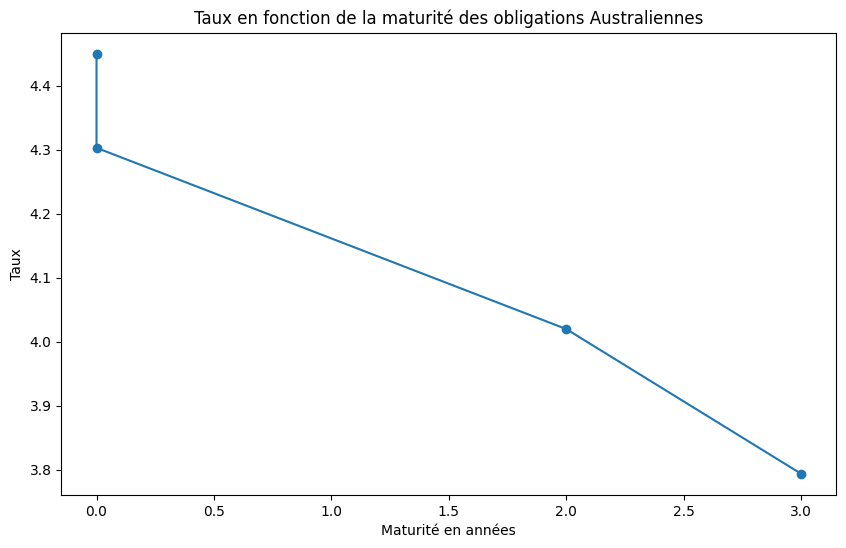

In [104]:
#Affiche la courbe des taux pour les obligations australiennes
import matplotlib.pyplot as plt

df_aus = df[df['ISSUER_COUNTRY'] == 'AUSTRALIA']

# create a figure and axis
fig, ax = plt.subplots()

# scatter the yield of the bonds against the number of years left to maturity
year = df_aus['MATURITY'].dt.year - 2025
ax.scatter(year, df_aus['YIELD %'])

#relie les points avec une courbe approximative non linéaire arrondie
ax.plot(year, df_aus['YIELD %'])

# set a title and labels
ax.set_title('Taux en fonction de la maturité des obligations Australiennes')
ax.set_xlabel('Maturité en années')
ax.set_ylabel('Taux')
ax.figure.set_size_inches(10, 6)

plt.show()



**Commentaire Australie** : On observe que la courbe des taux, en fonction de la maturité, présente une pente décroissante, ce qui traduit une perception négative des investisseurs concernant l'évolution future du marché. Cette situation peut également être mise en perspective avec les développements économiques récents : l'inflation en Australie est désormais contenue dans la fourchette cible de 2-3\% depuis 2021, tandis que les taux directeurs de la Banque centrale d'Australie restent élevés à 4,35\%. Parallèlement, la baisse des taux d'intérêt aux États-Unis, qui influence largement l'économie mondiale, crée un contexte favorable à une réduction des taux en Australie. Ainsi, les investisseurs anticipent une diminution prochaine des taux d'intérêt, ce qui explique pourquoi les taux à moyen et long terme (notamment à 3 ans) se situent en deçà des taux à court terme.

Sources : https://www.rba.gov.au/cash-rate-target-overview.html, https://www.rba.gov.au/inflation-overview.html

#### Représentation graphique des taux des obligations coréennes

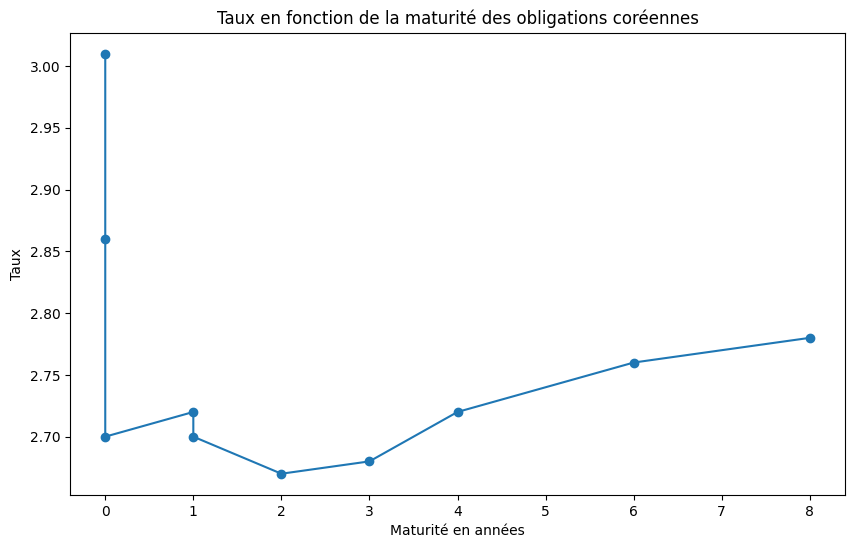

In [105]:
#Affiche la courbe des taux pour les obligations australiennes
import matplotlib.pyplot as plt

df_aus = df[df['ISSUER_COUNTRY'] == 'KOREA']

# create a figure and axis
fig, ax = plt.subplots()

# scatter the yield of the bonds against the number of years left to maturity
year = df_aus['MATURITY'].dt.year - 2025
ax.scatter(year, df_aus['YIELD %'])

#relie les points avec une courbe approximative non linéaire arrondie
ax.plot(year, df_aus['YIELD %'])

# set a title and labels
ax.set_title('Taux en fonction de la maturité des obligations coréennes')
ax.set_xlabel('Maturité en années')
ax.set_ylabel('Taux')

ax.figure.set_size_inches(10, 6)
plt.show()



**Commentaire Corée** : La courbe des taux en fonction de la maturité présente une pente décroissante jusqu'à 2 ans, témoignant à nouveau de la perception négative des investisseurs quant aux perspectives économiques. Cette configuration s’explique avec le fait que  malgré deux baisses de taux en 2024, la croissance économique en Corée demeure bien en deçà des attentes, atteignant seulement 1,3 \% en octobre 2024, contre un objectif de 2 \%. Cette faiblesse économique alimente les craintes d’une récession imminente. Par conséquent, une nouvelle baisse des taux d’intérêt dès le début de 2025 apparaît hautement probable pour éviter la récession, une anticipation reflétée dans la courbe des taux actuelle. Néanmoins, on observe une inflexion avec une remontée des taux à partir d’une maturité de 3 ans, traduisant un pessimisme persistant à moyen terme, mais laissant entrevoir un certain optimisme quant à un redressement éventuel à plus long terme.

Sources : https://www.bok.or.kr/eng/main/contents.do?menuNo=400015, https://www.bok.or.kr/eng/singl/baseRate/progress.do?dataSeCd=01&menuNo=400016

## Analyse de la performance du portefeuille

In [106]:
pf = pd.read_excel('Bonds_Risk_Perf.xlsx', sheet_name='Ptf')
pf

,DATE,PTF VALUE
0,2024-01-01,1075554246
1,2024-01-02,1075141434
2,2024-01-03,1074889540
3,2024-01-04,1075030530
4,2024-01-05,1075089574
...,...,...
232,2024-12-02,1120812291
233,2024-12-03,1121027542
234,2024-12-04,1122290638
235,2024-12-05,1122331466


Conversion de la date au format datetime

In [107]:
pf['DATE'] = pd.to_datetime(pf['DATE'])

### Affichage de la performance du portefeuille via un indice base 100

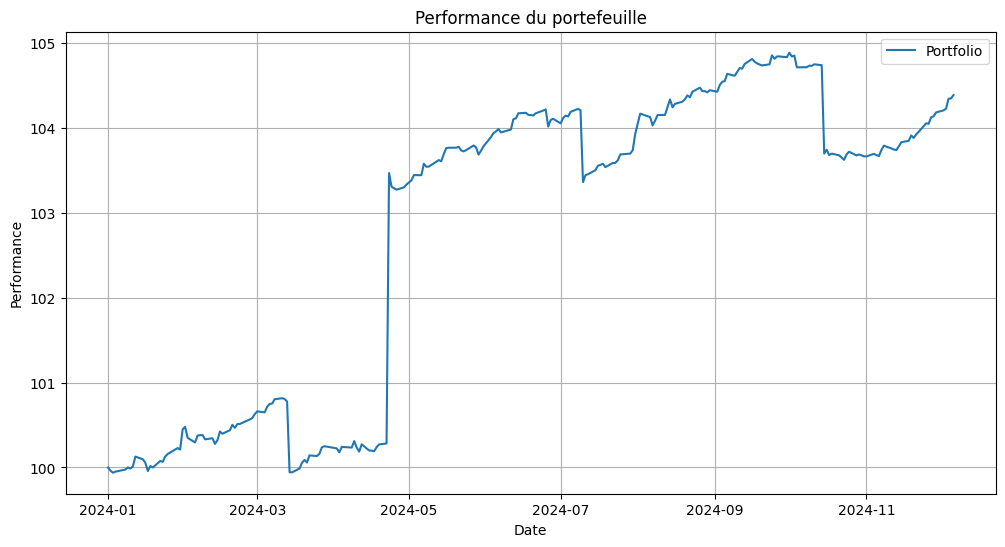

In [108]:
# Plot the performance of the portfolio
plt.figure(figsize=(12, 6))
plt.plot(pf['DATE'], pf['PTF VALUE']/pf['PTF VALUE'].iloc[0]*100, label='Portfolio')
plt.title('Performance du portefeuille')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)
plt.show()

### Value at Risk des rendements quotidiens

VaR paramétrique au niveau de confiance 99%

In [109]:
# Returns of the portfolio calculated
pf['returns'] = pf['PTF VALUE'].pct_change()
pf

# Drop the missing values
pf.dropna(inplace=True)

In [110]:
# Calculate the VaR at 95% confidence level for the portfolio
def VaR_99(returns):
    # -2.33 is the z-score for 99% confidence level
    return -2.33*returns.std() + returns.mean()


Application de la fonction à l'ensemble de nos données

In [111]:
pf['VaR 1 Mois'] = pf['returns'].rolling(window=21).apply(VaR_99)
pf

,DATE,PTF VALUE,returns,VaR 1 Mois
1,2024-01-02,1075141434,-0.000384,NaN
2,2024-01-03,1074889540,-0.000234,NaN
3,2024-01-04,1075030530,0.000131,NaN
4,2024-01-05,1075089574,0.000055,NaN
5,2024-01-08,1075296633,0.000193,NaN
...,...,...,...,...
232,2024-12-02,1120812291,0.000232,-0.000574
233,2024-12-03,1121027542,0.000192,-0.000579
234,2024-12-04,1122290638,0.001127,-0.000606
235,2024-12-05,1122331466,0.000036,-0.000582


### Expected Shortfall Historique au niveau de confiance 95%

Pour calculer l'Expected Shortfall historique à un certain niveau de confiance, on détermine la moyenne des rendements qui sont inférieurs ou égaux à la Value at Risk historique correspondant à ce niveau de confiance.

In [112]:
def Expected_Shortfall_historical(returns, confidence_level=0.95):
    # calculate the Expected shorfall at 95% confidence level
    return returns[returns < returns.quantile(1-confidence_level)].mean()

In [113]:
pf["Expected Shortfall"] = pf['returns'].rolling(window=21).apply(Expected_Shortfall_historical)
pf

,DATE,PTF VALUE,returns,VaR 1 Mois,Expected Shortfall
1,2024-01-02,1075141434,-0.000384,NaN,NaN
2,2024-01-03,1074889540,-0.000234,NaN,NaN
3,2024-01-04,1075030530,0.000131,NaN,NaN
4,2024-01-05,1075089574,0.000055,NaN,NaN
5,2024-01-08,1075296633,0.000193,NaN,NaN
...,...,...,...,...,...
232,2024-12-02,1120812291,0.000232,-0.000574,-0.000295
233,2024-12-03,1121027542,0.000192,-0.000579,-0.000295
234,2024-12-04,1122290638,0.001127,-0.000606,-0.000295
235,2024-12-05,1122331466,0.000036,-0.000582,-0.000295


### Graphique représentant la Value at Risk paramétrique au niveau de confiance 99% et l'Expected Shortfall Historique au niveau de confiance 95%

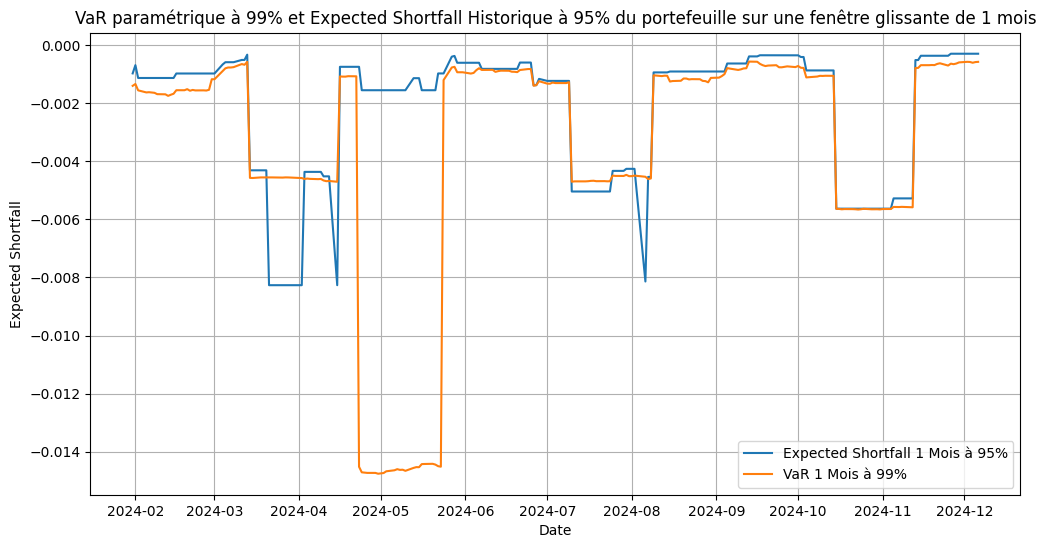

In [114]:
#Plot the Expected Shortfall and VaR of the portfolio
plt.figure(figsize=(12, 6))
plt.plot(pf['DATE'], pf['Expected Shortfall'], label='Expected Shortfall 1 Mois à 95%') 
plt.plot(pf['DATE'], pf['VaR 1 Mois'], label='VaR 1 Mois à 99%')
plt.title('VaR paramétrique à 99% et Expected Shortfall Historique à 95% du portefeuille sur une fenêtre glissante de 1 mois')
plt.xlabel('Date')
plt.ylabel('Expected Shortfall')
plt.legend()
plt.grid(True)
plt.show()

On constate que l'intervalle de 30 jours n'est pas optimal, car la VaR et l'Expected Shortfall présentent une forte sensibilité à la période temporelle choisie. Cela suggère que la mesure de risque pourrait être biaisée ou peu représentative. 

De plus, il est impossible de comparer directement les deux mesures, car elles sont calculées avec des niveaux de confiance différents.

### Affichage de l'Histogramme des rendements quotidiens

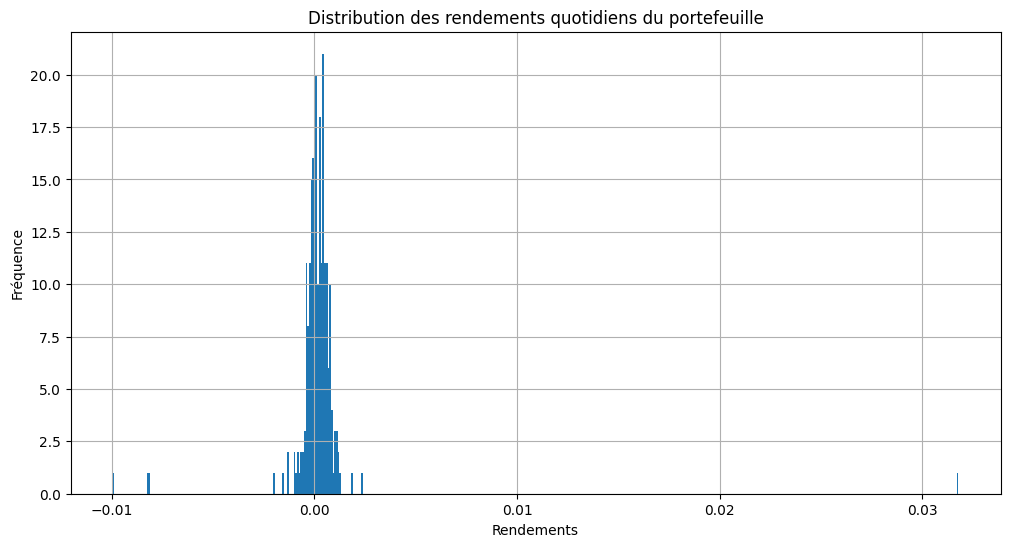

In [115]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(12, 6))
plt.hist(pf['returns'], bins=500)

#Add the normal distribution that fits the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

plt.title('Distribution des rendements quotidiens du portefeuille')
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

#### Métrique la plus pertinente

Avec la distribution des rendements, on observe qu'elle ne suit pas une loi normale et qu'elle présente des valeurs extrêmes nettement éloignées de la plage de rendements habituels. Cela met en évidence une limite importante de la VaR : elle ne renseigne pas sur l'ampleur des pertes lorsque le seuil de la VaR est dépassé. Or, dans ce cas, on constate que les rendements historiques dépassant la VaR sont considérablement éloignés de cette dernière. De plus, la VaR paramétrique repose sur l'hypothèse que la distribution suit une loi normale, ce qui n'est pas le cas ici, rendant la VaR paramétrique significativement différente de la VaR historique.

Compte tenu de ces deux limitations, l'Expected Shortfall historique apparaît comme une mesure bien plus pertinente pour notre portefeuille. Elle indique l'ampleur des pertes potentielles lorsque la VaR est dépassée et repose sur des données historiques réelles. Bien que cette approche ne soit pas parfaite, elle est plus réaliste que de supposer une distribution normale.

Cependant, il convient également de noter que le calcul de ces mesures de risque sur une fenêtre glissante d'un mois (21 jours de trading) est problématique. Cette période est relativement courte, ce qui rend les résultats fortement dépendants de l'intervalle temporel choisi. Un si faible nombre de données pour calculer la VaR ou l'Expected Shortfall rend ces mesures peu robustes et inadaptées pour évaluer précisément le risque réel.

#### Représentation de la distribution des rendements journaliers accompagnée de la courbe de la loi normale correspondante, ainsi que des seuils de la VaR et de l'Expected Shortfall

Ici, nous affichons l'histogramme des rendements journaliers, la courbe de la loi normale ajustée aux paramètres de nos rendements sur l'ensemble du jeu de données, ainsi que les seuils de la VaR paramétrique et de l'Expected Shortfall historique pour un niveau de confiance de 99% également pour l'ensemble du jeu de données.

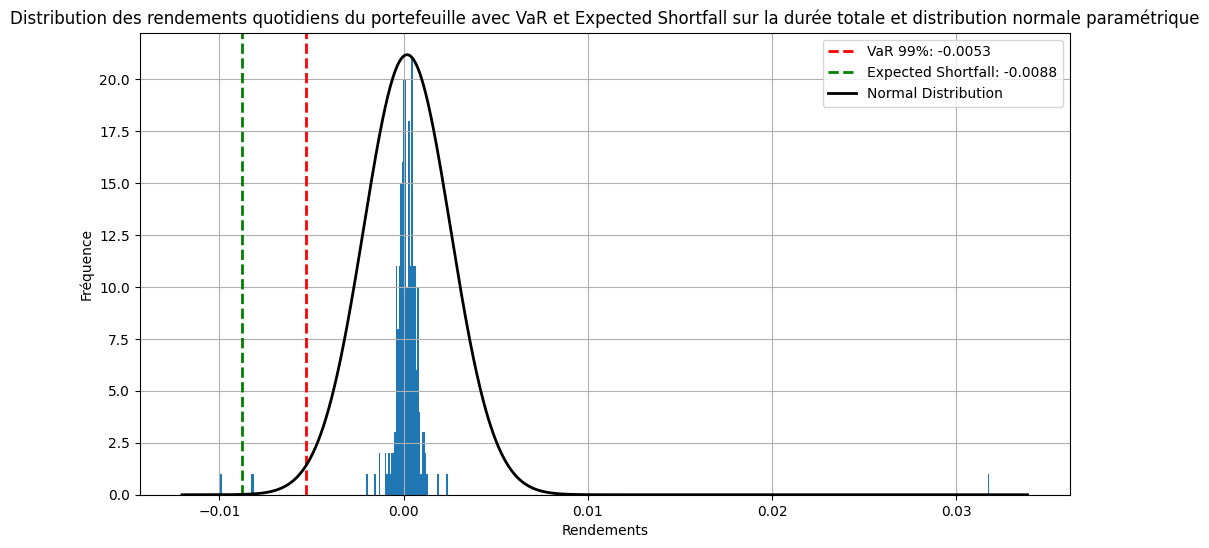

In [116]:
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(12, 6))
plt.hist(pf['returns'], bins=500)

#Add the normal distribution that fits the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)

#Plot la value at risk sur la durée totale du portefeuille
VaR = VaR_99(pf['returns'])
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2)

#Plot l'expected shortfall sur la durée totale du portefeuille
ES = Expected_Shortfall_historical(pf['returns'], 0.99)
plt.axvline(ES, color='g', linestyle='dashed', linewidth=2)

#Plot la distribution normale des rendements du portefeuille
p = norm.pdf(x, pf['returns'].mean(), pf['returns'].std())
plt.plot(x, p/8, 'k', linewidth=2)

#Affiche les valeurs de VaR et ES en légende et leur valeur
plt.legend(['VaR 99%: {:.4f}'.format(VaR), 'Expected Shortfall: {:.4f}'.format(ES), 'Normal Distribution'])


plt.title('Distribution des rendements quotidiens du portefeuille avec VaR et Expected Shortfall sur la durée totale et distribution normale paramétrique')  
plt.xlabel('Rendements')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

On observe clairement que nos rendements ne suivent pas une loi normale, notamment en raison des valeurs extrêmes. Pour obtenir une estimation plus précise de la VaR et de l'Expected Shortfall, d'autres méthodes pourraient être envisagées. Par exemple, une approche non paramétrique utilisant une estimation par noyau (kernel density estimation) permettrait d'ajuster la distribution à nos données de manière plus flexible, tout en évitant un surajustement. 

De plus, la théorie des valeurs extrêmes pourrait être une alternative pertinente. En utilisant des estimateurs comme ceux de Pickands ou de Hill, il serait possible de modéliser les queues de la distribution et ainsi calculer une VaR plus adaptée à la présence de valeurs extrêmes dans les rendements. Ces méthodes offrent une meilleure prise en compte des comportements atypiques des données, améliorant ainsi la robustesse de nos mesures de risque.

### Tableau synthétique des métriques

#### Rendement quotidien Moyen et Médian

In [117]:
mean_returns = pf['returns'].mean()
median_returns = pf['returns'].median()

print(f"Mean Returns: {mean_returns*100}%")
print(f"Median Returns: {median_returns*100}%")

Mean Returns: 0.018470596822021183%
Median Returns: 0.01327391576440018%


#### Sharpe Ratio

In [118]:
mean_ester_rate_daily = 0.03644/252
Sharpe_ratio = (pf['returns'].mean()-mean_ester_rate_daily)/pf['returns'].std()
print(f"Sharpe Ratio: {Sharpe_ratio}")

Sharpe Ratio: 0.01703642776993948


#### Maximum Drawdown

In [119]:
# Compute the maximum drawdown
maximum_drawdown = 0

for i in range(1, len(pf)):
    for j in range(i, len(pf)):
        drawdown = (pf['PTF VALUE'].iloc[j] - pf['PTF VALUE'].iloc[i-1]) / pf['PTF VALUE'].iloc[i-1]
        if drawdown < maximum_drawdown:
            maximum_drawdown = drawdown
            index_max = j
            index_min = i

print(f"Maximum Drawdown: {maximum_drawdown*100}%")
print(f"Maximum Drawdown Date Interval:  from {pf['DATE'].iloc[index_min]} to {pf['DATE'].iloc[index_max]}")

Maximum Drawdown: -1.2026278090109972%
Maximum Drawdown Date Interval:  from 2024-10-02 00:00:00 to 2024-10-23 00:00:00


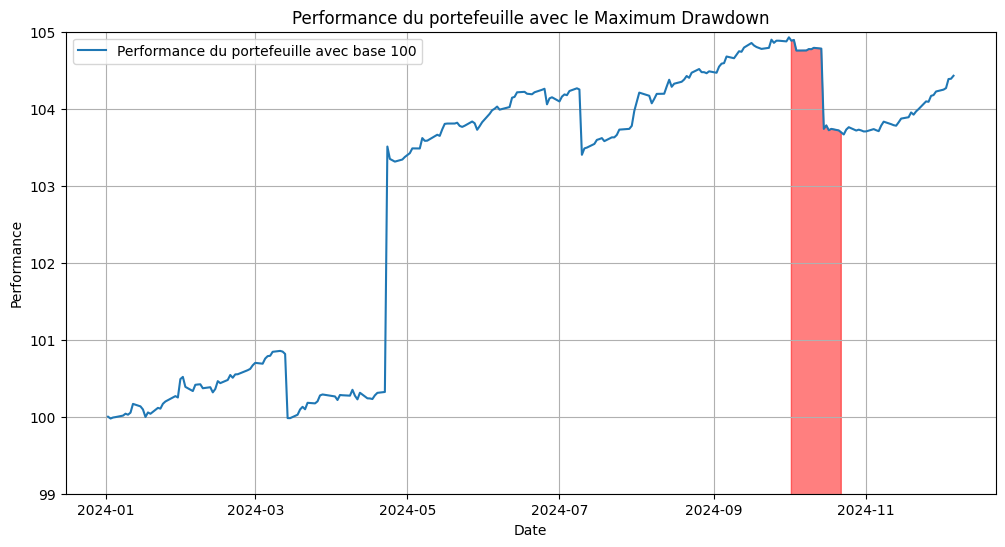

In [120]:
#plot the maximum drawdown on the portfolio performance
plt.figure(figsize=(12, 6))
plt.plot(pf['DATE'], pf['PTF VALUE']/pf['PTF VALUE'].iloc[0]*100, label='Performance du portefeuille avec base 100') 
plt.fill_between(pf['DATE'].iloc[index_min:index_max], pf['PTF VALUE'].iloc[index_min:index_max]/pf['PTF VALUE'].iloc[0]*100, 
                 color='red', alpha=0.5)
plt.title('Performance du portefeuille avec le Maximum Drawdown') 
plt.xlabel('Date')
plt.ylabel('Performance')
#change the y-axis limits
plt.ylim(99, 105)   
plt.legend()
plt.grid(True)
plt.show()